In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wragling**

**Gathering Data**

In [3]:
dinper_df = pd.read_csv("/content/Dinas Pertanian.csv")
print(dinper_df.shape)
print(dinper_df)

(46, 4)
                                               Uraian Satuan     2023  Ket
0                         Luas Lahan Sawah Beririgasi     Ha  1017.00  NaN
1                        Luas Lahan Sawah Tadah Hujan     Ha   246.00  NaN
2                             Luas Lahan Kering Kebun     Ha  3197.00  NaN
3                            Luas Lahan Kering Ladang     Ha  2013.00  NaN
4                                Jumlah Produksi Padi    Ton  9498.07  NaN
5                              Jumlah Produksi Jagung    Ton   132.30  NaN
6   Jumlah Produksi Buah Kecamatan Lubuklinggau Ti...    Ton   250.00  NaN
7   Jumlah Produksi Buah Kecamatan Lubuklinggau Ti...    Ton   450.00  NaN
8   Jumlah Produksi Buah Kecamatan Lubuklinggau Ba...    Ton   780.00  NaN
9   Jumlah Produksi Buah Kecamatan Lubuklinggau Ba...    Ton   750.00  NaN
10  Jumlah Produksi Buah Kecamatan Lubuklinggau Se...    Ton   950.00  NaN
11  Jumlah Produksi Buah Kecamatan Lubuklinggau Se...    Ton   455.00  NaN
12  Jumlah Produk

**Assessing Data**

In [4]:
# Menampilkan informasi pada dataset
dinper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Uraian  46 non-null     object 
 1   Satuan  46 non-null     object 
 2   2023    46 non-null     float64
 3   Ket     0 non-null      float64
dtypes: float64(2), object(2)
memory usage: 1.6+ KB


In [5]:
# Memeriksa missing value
dinper_df.isna().sum()

,0
Uraian,0
Satuan,0
2023,0
Ket,46


In [6]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", dinper_df.duplicated().sum())

Jumlah duplikasi:  0


**Cleaning Data**

In [7]:
# Menghapus kolom yang tidak diperlukan
dinper_df = dinper_df.drop(columns=["Ket"])
print(dinper_df)

                                               Uraian Satuan     2023
0                         Luas Lahan Sawah Beririgasi     Ha  1017.00
1                        Luas Lahan Sawah Tadah Hujan     Ha   246.00
2                             Luas Lahan Kering Kebun     Ha  3197.00
3                            Luas Lahan Kering Ladang     Ha  2013.00
4                                Jumlah Produksi Padi    Ton  9498.07
5                              Jumlah Produksi Jagung    Ton   132.30
6   Jumlah Produksi Buah Kecamatan Lubuklinggau Ti...    Ton   250.00
7   Jumlah Produksi Buah Kecamatan Lubuklinggau Ti...    Ton   450.00
8   Jumlah Produksi Buah Kecamatan Lubuklinggau Ba...    Ton   780.00
9   Jumlah Produksi Buah Kecamatan Lubuklinggau Ba...    Ton   750.00
10  Jumlah Produksi Buah Kecamatan Lubuklinggau Se...    Ton   950.00
11  Jumlah Produksi Buah Kecamatan Lubuklinggau Se...    Ton   455.00
12  Jumlah Produksi Buah Kecamatan Lubuklinggau Ut...    Ton   900.00
13  Jumlah Produksi 

In [8]:
# Save data clean
dinper_df.to_csv('dinper_clean.csv', index=False)

# **Exploratory Data Analysis (EDA)**

In [9]:
# Melihat Jumlah Produksi Buah
# Baca file CSV
df = pd.read_csv("dinper_clean.csv")

# Filter baris yang mengandung "Jumlah Produksi Buah"
buah_df = df[df["Uraian"].str.contains("Jumlah Produksi Buah", case=False)].copy()

# Ekstrak nama kecamatan dari kolom 'Uraian'
buah_df["Kecamatan"] = buah_df["Uraian"].str.extract(r'Kecamatan\s+([\w\s]+)', expand=False).str.strip()

# Hitung jumlah produksi per kecamatan
produksi_per_kecamatan = buah_df.groupby("Kecamatan")["2023"].sum().reset_index()

# Hitung total seluruh produksi buah
total_produksi = produksi_per_kecamatan["2023"].sum()

# Tampilkan tabel statistik deskriptif
statistik_tabel = produksi_per_kecamatan["2023"].describe().to_frame().rename(columns={"2023": "Statistik Produksi Buah"})

# Cetak hasil
print("\nJumlah Produksi Buah per Kecamatan:")
print(produksi_per_kecamatan)

print("\nTotal Seluruh Produksi Buah:", total_produksi, "Ton")

print("\nStatistik Deskriptif Produksi Buah per Kecamatan:")
print(statistik_tabel)


Jumlah Produksi Buah per Kecamatan:
                 Kecamatan   2023
0     Lubuklinggau Barat I  780.0
1    Lubuklinggau Barat II  750.0
2   Lubuklinggau Selatan I  950.0
3  Lubuklinggau Selatan II  455.0
4     Lubuklinggau Timur I  250.0
5    Lubuklinggau Timur II  450.0
6     Lubuklinggau Utara I  900.0
7    Lubuklinggau Utara II  220.0

Total Seluruh Produksi Buah: 4755.0 Ton

Statistik Deskriptif Produksi Buah per Kecamatan:
       Statistik Produksi Buah
count                 8.000000
mean                594.375000
std                 287.246006
min                 220.000000
25%                 400.000000
50%                 602.500000
75%                 810.000000
max                 950.000000


In [10]:
# Melihat Jumlah Produksi Sayuran
# Baca file CSV
df = pd.read_csv("dinper_clean.csv")

# Filter baris yang mengandung "Jumlah Produksi Sayuran"
sayur_df = df[df["Uraian"].str.contains("Jumlah Produksi Sayur", case=False)].copy()

# Ekstrak nama kecamatan dari kolom 'Uraian'
sayur_df["Kecamatan"] = sayur_df["Uraian"].str.extract(r'Kecamatan\s+([\w\s]+)', expand=False).str.strip()

# Hitung jumlah produksi per kecamatan
produksi_per_kecamatan = sayur_df.groupby("Kecamatan")["2023"].sum().reset_index()

# Hitung total seluruh produksi Sayur
total_produksi = produksi_per_kecamatan["2023"].sum()

# Tampilkan tabel statistik deskriptif
statistik_tabel = produksi_per_kecamatan["2023"].describe().to_frame().rename(columns={"2023": "Statistik Produksi Sayur"})

# Cetak hasil
print("\nJumlah Produksi Sayur per Kecamatan:")
print(produksi_per_kecamatan)

print("\nTotal Seluruh Produksi Sayur:", total_produksi, "Ton")

print("\nStatistik Deskriptif Produksi Sayur per Kecamatan:")
print(statistik_tabel)


Jumlah Produksi Sayur per Kecamatan:
                 Kecamatan   2023
0     Lubuklinggau Barat I  120.0
1    Lubuklinggau Barat II  120.0
2   Lubuklinggau Selatan I   65.0
3  Lubuklinggau Selatan II  100.0
4     Lubuklinggau Timur I   15.0
5    Lubuklinggau Timur II   20.0
6     Lubuklinggau Utara I  195.0
7    Lubuklinggau Utara II   25.0

Total Seluruh Produksi Sayur: 660.0 Ton

Statistik Deskriptif Produksi Sayur per Kecamatan:
       Statistik Produksi Sayur
count                  8.000000
mean                  82.500000
std                   63.075918
min                   15.000000
25%                   23.750000
50%                   82.500000
75%                  120.000000
max                  195.000000


In [11]:
# Melihat Jumlah Produksi Obat Nabati
# Baca file CSV
df = pd.read_csv("dinper_clean.csv")

# Filter baris yang mengandung "Jumlah Produksi Obat"
obat_df = df[df["Uraian"].str.contains("Jumlah Produksi Obat Nabati", case=False)].copy()

# Ekstrak nama kecamatan dari kolom 'Uraian'
obat_df["Kecamatan"] = obat_df["Uraian"].str.extract(r'Kecamatan\s+([\w\s]+)', expand=False).str.strip()

# Hitung jumlah produksi per kecamatan
produksi_per_kecamatan = obat_df.groupby("Kecamatan")["2023"].sum().reset_index()

# Hitung total seluruh produksi obat
total_produksi = produksi_per_kecamatan["2023"].sum()

# Tampilkan tabel statistik deskriptif
statistik_tabel = produksi_per_kecamatan["2023"].describe().to_frame().rename(columns={"2023": "Statistik Produksi Obat Nabati"})

# Cetak hasil
print("\nJumlah Produksi Obat Nabati per Kecamatan:")
print(produksi_per_kecamatan)

print("\nTotal Seluruh Produksi Obat Nabati:", total_produksi, "Ton")

print("\nStatistik Deskriptif Produksi Obat Nabati per Kecamatan:")
print(statistik_tabel)


Jumlah Produksi Obat Nabati per Kecamatan:
                 Kecamatan  2023
0     Lubuklinggau Barat I  30.0
1    Lubuklinggau Barat II  10.0
2   Lubuklinggau Selatan I  71.0
3  Lubuklinggau Selatan II  20.0
4     Lubuklinggau Timur I   1.0
5    Lubuklinggau Timur II   1.0
6     Lubuklinggau Utara I   7.0
7    Lubuklinggau Utara II   2.0

Total Seluruh Produksi Obat Nabati: 142.0 Ton

Statistik Deskriptif Produksi Obat Nabati per Kecamatan:
       Statistik Produksi Obat Nabati
count                        8.000000
mean                        17.750000
std                         23.831252
min                          1.000000
25%                          1.750000
50%                          8.500000
75%                         22.500000
max                         71.000000


In [12]:
# Melihat Jumlah Populasi Ternak Ayam
# Baca file CSV
df = pd.read_csv("dinper_clean.csv")

# Filter baris yang mengandung "Jumlah Populasi Ternak Ayam"
ayam_df = df[df["Uraian"].str.contains("Jumlah Populasi Ternak Ayam", case=False)].copy()

# Ekstrak nama kecamatan dari kolom 'Uraian'
ayam_df["Kecamatan"] = ayam_df["Uraian"].str.extract(r'Kecamatan\s+([\w\s]+)', expand=False).str.strip()

# Hitung jumlah produksi per kecamatan
populasi_per_kecamatan = ayam_df.groupby("Kecamatan")["2023"].sum().reset_index()

# Hitung total seluruh populasi ayam
total_populasi = populasi_per_kecamatan["2023"].sum()

# Tampilkan tabel statistik deskriptif
statistik_tabel = populasi_per_kecamatan["2023"].describe().to_frame().rename(columns={"2023": "Statistik Populasi Ternak Ayam"})

# Cetak hasil
print("\nJumlah Populasi Ternak Ayam per Kecamatan:")
print(populasi_per_kecamatan)

print("\nTotal Seluruh Populasi Ternak Ayam:", total_populasi, "Ekor")

print("\nStatistik Deskriptif Populasi Ternak Ayam per Kecamatan:")
print(statistik_tabel)


Jumlah Populasi Ternak Ayam per Kecamatan:
                 Kecamatan    2023
0     Lubuklinggau Barat I  7300.0
1    Lubuklinggau Barat II  4500.0
2   Lubuklinggau Selatan I  9740.0
3  Lubuklinggau Selatan II  9920.0
4     Lubuklinggau Timur I  5000.0
5    Lubuklinggau Timur II  7800.0
6     Lubuklinggau Utara I  8740.0
7    Lubuklinggau Utara II  8850.0

Total Seluruh Populasi Ternak Ayam: 61850.0 Ekor

Statistik Deskriptif Populasi Ternak Ayam per Kecamatan:
       Statistik Populasi Ternak Ayam
count                        8.000000
mean                      7731.250000
std                       2041.927923
min                       4500.000000
25%                       6725.000000
50%                       8270.000000
75%                       9072.500000
max                       9920.000000


In [13]:
# Melihat Jumlah Populasi Ternak Itik
# Baca file CSV
df = pd.read_csv("dinper_clean.csv")

# Filter baris yang mengandung "Jumlah Populasi Ternak Itik"
itik_df = df[df["Uraian"].str.contains("Jumlah Populasi Ternak Itik", case=False)].copy()

# Ekstrak nama kecamatan dari kolom 'Uraian'
itik_df["Kecamatan"] = itik_df["Uraian"].str.extract(r'Kecamatan\s+([\w\s]+)', expand=False).str.strip()

# Hitung jumlah produksi per kecamatan
populasi_per_kecamatan = itik_df.groupby("Kecamatan")["2023"].sum().reset_index()

# Hitung total seluruh populasi itik
total_populasi = populasi_per_kecamatan["2023"].sum()

# Tampilkan tabel statistik deskriptif
statistik_tabel = populasi_per_kecamatan["2023"].describe().to_frame().rename(columns={"2023": "Statistik Populasi Ternak Itik"})

# Cetak hasil
print("\nJumlah Populasi Ternak Itik per Kecamatan:")
print(populasi_per_kecamatan)

print("\nTotal Seluruh Populasi Ternak Itik:", total_populasi, "Ekor")

print("\nStatistik Deskriptif Populasi Ternak Itik per Kecamatan:")
print(statistik_tabel)


Jumlah Populasi Ternak Itik per Kecamatan:
                 Kecamatan    2023
0     Lubuklinggau Barat I  1550.0
1    Lubuklinggau Barat II  1150.0
2   Lubuklinggau Selatan I  2100.0
3  Lubuklinggau Selatan II  2300.0
4     Lubuklinggau Timur I  1350.0
5    Lubuklinggau Timur II  1600.0
6     Lubuklinggau Utara I  2100.0
7    Lubuklinggau Utara II  2300.0

Total Seluruh Populasi Ternak Itik: 14450.0 Ekor

Statistik Deskriptif Populasi Ternak Itik per Kecamatan:
       Statistik Populasi Ternak Itik
count                        8.000000
mean                      1806.250000
std                        448.360107
min                       1150.000000
25%                       1500.000000
50%                       1850.000000
75%                       2150.000000
max                       2300.000000


# **Visualization & Explanatory Analysis**

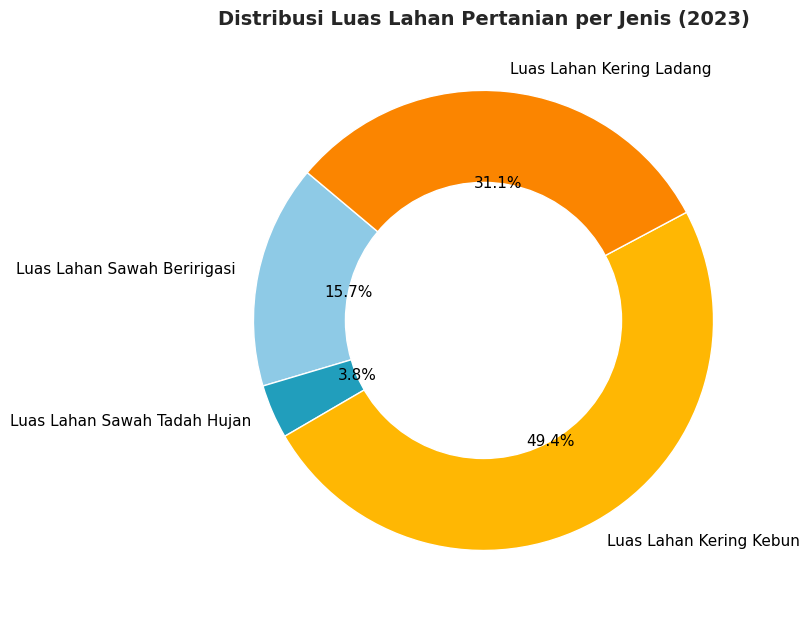

In [23]:
# Luas Lahan
# Baca file CSV
df = pd.read_csv("dinper_clean.csv")

# Jenis lahan yang ingin divisualisasikan
list_lahan = [
    "Luas Lahan Sawah Beririgasi",
    "Luas Lahan Sawah Tadah Hujan",
    "Luas Lahan Kering Kebun",
    "Luas Lahan Kering Ladang"
]

# Filter data
lahan_df = df[df["Uraian"].isin(list_lahan)].copy()

# Ambil label dan nilai
labels = lahan_df["Uraian"]
sizes = lahan_df["2023"]

# Warna kustom pastel kontras
colors = ["#8ecae6", "#219ebc", "#ffb703", "#fb8500"]

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 11, 'color': 'black'},
    wedgeprops={'edgecolor': 'white'}
)

# Lingkaran tengah agar jadi donut (opsional)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Judul
plt.title("Distribusi Luas Lahan Pertanian per Jenis (2023)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-1852435775.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=total_df, x="Komoditas", y="Jumlah Produksi", palette="YlOrRd")


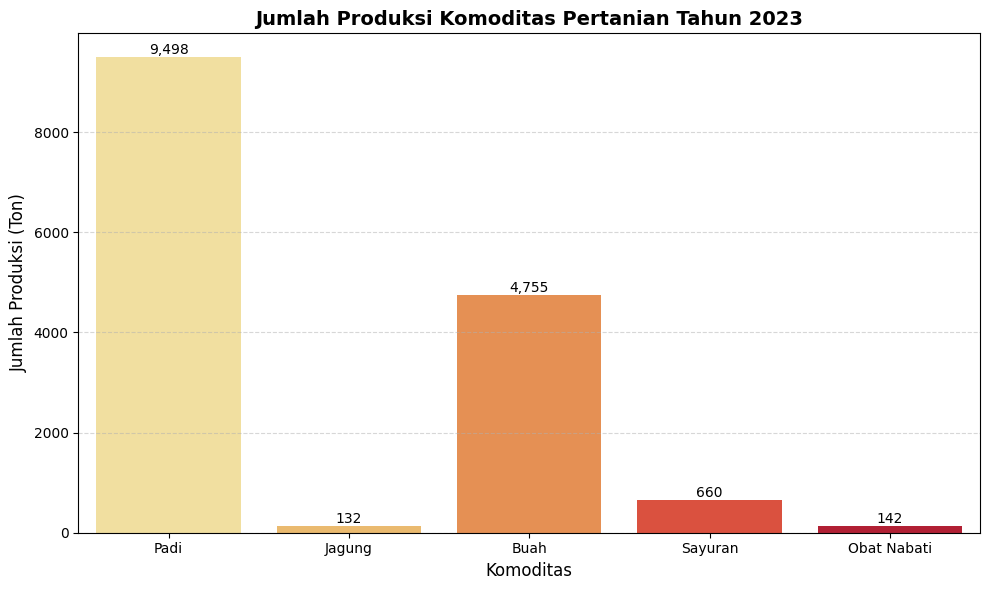

In [15]:
# Jumlah Produksi Padi, Jagung, Buah, Sayuran, dan Obat Nabati
# Baca file CSV yang sudah dibersihkan
df = pd.read_csv("dinper_clean.csv")

# Definisikan daftar kata kunci kategori produksi
kategori_produksi = {
    "Jumlah Produksi Padi": "Padi",
    "Jumlah Produksi Jagung": "Jagung",
    "Jumlah Produksi Buah": "Buah",
    "Jumlah Produksi Sayur": "Sayuran",
    "Jumlah Produksi Obat Nabati": "Obat Nabati"
}

# Inisialisasi list untuk menyimpan total
hasil_total = []

# Hitung total untuk setiap kategori
for key, label in kategori_produksi.items():
    total = df[df["Uraian"].str.contains(key, case=False)]["2023"].sum()
    hasil_total.append((label, total))

# Ubah ke DataFrame
total_df = pd.DataFrame(hasil_total, columns=["Komoditas", "Jumlah Produksi"])

# Visualisasi
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=total_df, x="Komoditas", y="Jumlah Produksi", palette="YlOrRd")

# Anotasi di atas batang
for p in bar.patches:
    bar.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

# Styling
plt.title("Jumlah Produksi Komoditas Pertanian Tahun 2023", fontsize=14, weight='bold')
plt.ylabel("Jumlah Produksi (Ton)", fontsize=12)
plt.xlabel("Komoditas", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-21-663446595.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=populasi_per_kecamatan, x="Kecamatan", y="2023", palette="coolwarm")


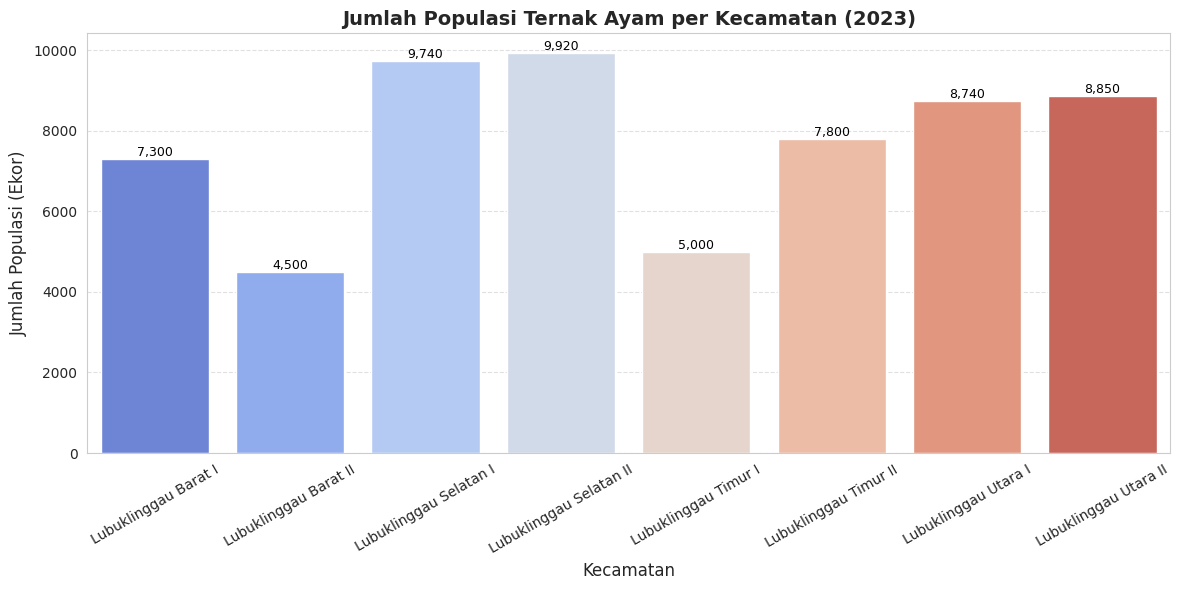

In [21]:
# Ternak Ayam
# Baca data
df = pd.read_csv("dinper_clean.csv")

# Filter data untuk populasi ternak ayam
ayam_df = df[df["Uraian"].str.contains("Jumlah Populasi Ternak Ayam", case=False)].copy()

# Ekstrak nama kecamatan
ayam_df["Kecamatan"] = ayam_df["Uraian"].str.extract(r'Kecamatan\s+([\w\s]+)', expand=False).str.strip()

# Hitung jumlah populasi per kecamatan
populasi_per_kecamatan = ayam_df.groupby("Kecamatan")["2023"].sum().reset_index()

# Visualisasi
plt.figure(figsize=(12, 6))
bar = sns.barplot(data=populasi_per_kecamatan, x="Kecamatan", y="2023", palette="coolwarm")

# Tambahkan anotasi pada tiap batang
for p in bar.patches:
    bar.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=9, color='black')

# Styling
plt.title("Jumlah Populasi Ternak Ayam per Kecamatan (2023)", fontsize=14, weight='bold')
plt.xlabel("Kecamatan", fontsize=12)
plt.ylabel("Jumlah Populasi (Ekor)", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

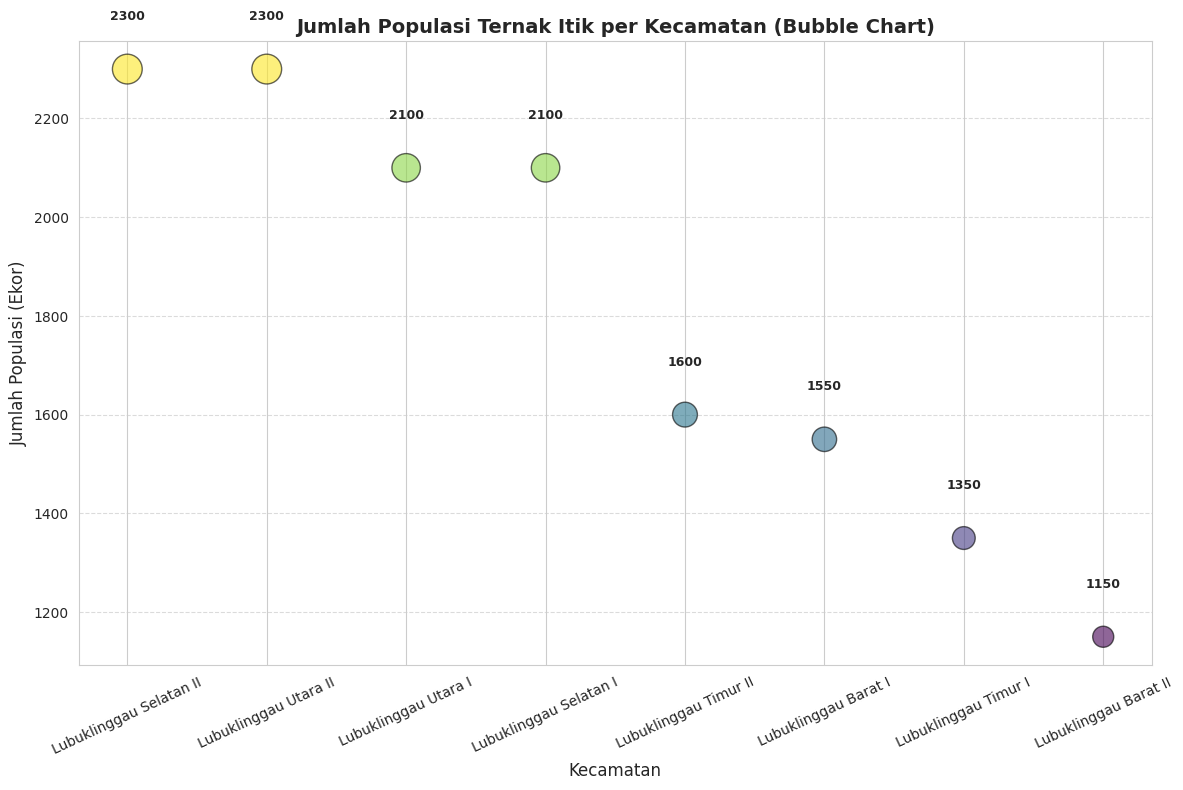

In [25]:
# Baca data
df = pd.read_csv("dinper_clean.csv")

# Filter data untuk populasi ternak itik
itik_df = df[df["Uraian"].str.contains("Jumlah Populasi Ternak Itik", case=False)].copy()
itik_df["Kecamatan"] = itik_df["Uraian"].str.extract(r'Kecamatan\s+([\w\s]+)', expand=False).str.strip()

# Hitung total populasi itik per kecamatan
populasi_df = itik_df.groupby("Kecamatan")["2023"].sum().reset_index()
populasi_df = populasi_df.sort_values(by="2023", ascending=False)

# Plot Bubble Chart
plt.figure(figsize=(12, 8))
bubble = plt.scatter(
    x=populasi_df["Kecamatan"],
    y=populasi_df["2023"],
    s=populasi_df["2023"] / 5,  # Ukuran gelembung
    alpha=0.6,
    c=populasi_df["2023"],
    cmap="viridis",
    edgecolors='black',
    linewidths=1
)

# Label
for i, row in populasi_df.iterrows():
    plt.text(
        row["Kecamatan"],
        row["2023"] + 100,
        f'{int(row["2023"])}',
        ha='center',
        fontsize=9,
        fontweight='bold'
    )

plt.title("Jumlah Populasi Ternak Itik per Kecamatan (Bubble Chart)", fontsize=14, weight='bold')
plt.xlabel("Kecamatan", fontsize=12)
plt.ylabel("Jumlah Populasi (Ekor)", fontsize=12)
plt.xticks(rotation=25)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()